## Day Objective
- Preprocessing 

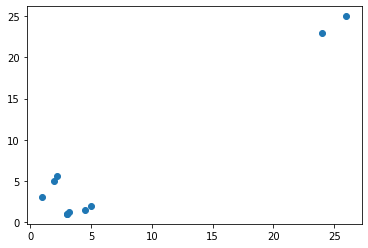

In [2]:
import matplotlib.pyplot as plt

x = [2,3,5,1,3,4.5,3.2,2.2,24,26]
y = [5,1,2,3,1,1.5,1.2,5.6,23,25]
plt.scatter(x,y)

#### Outliers
- Outliers are different from other data points in dataset which effects training process and resulting loss of accuracy in machine learning.

- For handling outliers, apply scaling techniques

#### Scaling Techniques
- Scaling is used to compress the values between a fixed range(0 to 1, mean to std, -ve to +ve)
    - Standard Scaler
    - Min Max Scaler
    - Robust Scaler
    - Normalizer
    - etc,..

### Standard scaler
- By applying standard scaler, the dataset will be normally distributed.
- It scales the data points between mean to unit variance
- Formula:
    - Z = (Xi - mean(X)) / std(X)

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/nagamounika5/Datasets/master/Advertisement.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 5)

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [9]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


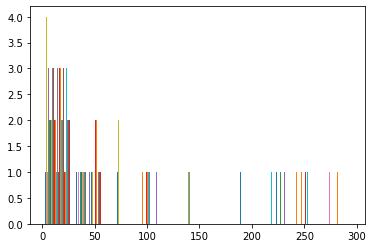

In [10]:
plt.hist(df)
plt.show()

In [12]:
df['TV'].mean()
df['TV'].std()

85.8542363149081

In [13]:
#  (Xi - mean(X)) / std(X)

(230.1 - 147.0425) / 85.85423631

0.9674245974316092

#### Apply standard scaler model
- Step1: Import the model
- Step2: Intialize the model in an object
- Step3: fit the model
- Step4: Convert array of values into dataframe

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
st1 = StandardScaler()
st1

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
st2 = st1.fit_transform(df)
st2

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00,
         1.55205313e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01,
        -6.96046111e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00,
        -9.07405869e-01],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00,
         8.60330287e-01],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00,
        -2.15683025e-01],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00,
        -1.31091086e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01,
        -4.27042783e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01,
        -1.58039455e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00,
        -1.77205942e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01,
        -6.57617064e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01,
        -1.04190753e+00],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00,
      

In [19]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [20]:
st2 = pd.DataFrame(st2, columns = df.columns)
st2.head()

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [21]:
import seaborn as sns

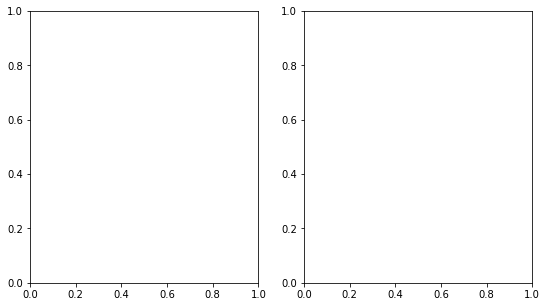

In [23]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (9,5))

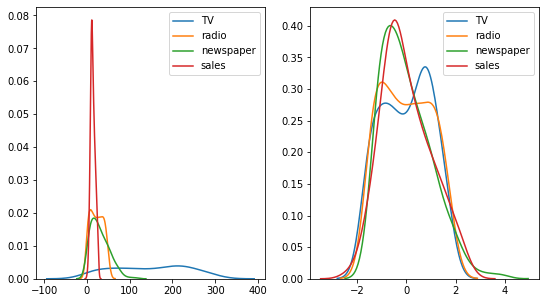

In [25]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (9,5))

sns.kdeplot(df['TV'], ax = ax1)
sns.kdeplot(df['radio'], ax = ax1)
sns.kdeplot(df['newspaper'], ax = ax1)
sns.kdeplot(df['sales'], ax = ax1)


sns.kdeplot(st2['TV'], ax = ax2)
sns.kdeplot(st2['radio'], ax = ax2)
sns.kdeplot(st2['newspaper'], ax = ax2)
sns.kdeplot(st2['sales'], ax = ax2)

In [26]:
sns.__version__

'0.9.0'

### MinMax Scaler
- It scales all the data points between either 0 to 1 or (-1 to +1)
- Formula:
    - [Xi - min(X)] / [max(X) - min(X)]

In [28]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [27]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [29]:
## [Xi - min(X)] / [max(X) - min(X)]
(230.1 - 0.7) / (296.4 - 0.7)

0.7757862698681096

#### MinMax scaler model

In [30]:
## step1
from sklearn.preprocessing import MinMaxScaler

In [31]:
## step2
m1 = MinMaxScaler()
m1

MinMaxScaler(copy=True, feature_range=(0, 1))

In [32]:
## step3
m2 = m1.fit_transform(df)
m2

array([[0.77578627, 0.76209677, 0.60598065, 0.80708661],
       [0.1481231 , 0.79233871, 0.39401935, 0.34645669],
       [0.0557998 , 0.92540323, 0.60686016, 0.30314961],
       [0.50997633, 0.83266129, 0.51187335, 0.66535433],
       [0.60906324, 0.21774194, 0.51099384, 0.44488189],
       [0.02705445, 0.9858871 , 0.65699208, 0.22047244],
       [0.19208657, 0.66129032, 0.20404573, 0.4015748 ],
       [0.4041258 , 0.39516129, 0.09938434, 0.45669291],
       [0.02671627, 0.04233871, 0.00615655, 0.12598425],
       [0.67331755, 0.05241935, 0.18381706, 0.35433071],
       [0.2211701 , 0.11693548, 0.21020229, 0.27559055],
       [0.72370646, 0.48387097, 0.03254178, 0.62204724],
       [0.07811972, 0.70766129, 0.5769569 , 0.2992126 ],
       [0.32735881, 0.15322581, 0.06068602, 0.31889764],
       [0.68785932, 0.66330645, 0.40193492, 0.68503937],
       [0.65843761, 0.96169355, 0.46262093, 0.81889764],
       [0.22691917, 0.73790323, 1.        , 0.42913386],
       [0.94927291, 0.7983871 ,

In [33]:
## step4
m2 = pd.DataFrame(m2, columns = df.columns)
m2.head()

,TV,radio,newspaper,sales
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.303150
3,0.509976,0.832661,0.511873,0.665354
4,0.609063,0.217742,0.510994,0.444882


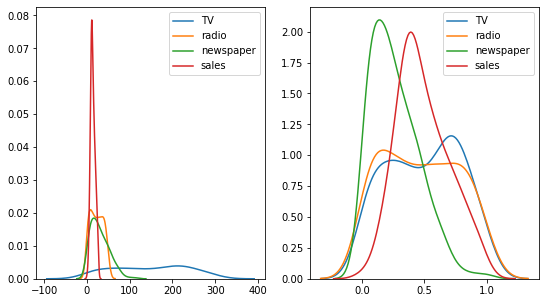

In [36]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (9,5))

sns.kdeplot(df['TV'], ax = ax1)
sns.kdeplot(df['radio'], ax = ax1)
sns.kdeplot(df['newspaper'], ax = ax1)
sns.kdeplot(df['sales'], ax = ax1)


sns.kdeplot(m2['TV'], ax = ax2)
sns.kdeplot(m2['radio'], ax = ax2)
sns.kdeplot(m2['newspaper'], ax = ax2)
sns.kdeplot(m2['sales'], ax = ax2)

### Robust scaler
- It is mainly used for dataset which contains large amount of outliers
- Scaling between IQR(25% to 75%)
- Formula:
    - (Xi - Q2(X)) / (Q3(X) - Q1(X))
        - Q1 - 25%(lower quantile)
        - Q2 - 50%(median)
        - Q3 - 75%(upper quantile)

#### Task1: Apply robust scaler model for advertisement dataset
#### Task2: Display visually before and after applying robust scaler